# Ex02 Multiclass

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
import numpy as np
%matplotlib inline

In [159]:
data = pd.read_csv('../data/checker_submits.csv')
data.timestamp = pd.to_datetime(data.timestamp)
data['hour'] = data.timestamp.dt.hour
data['dayofweek'] = data.timestamp.dt.weekday
data['uid'] = data.uid.astype('category')
data['labname'] = data.labname.astype('category')
data = data.drop(columns='timestamp')
data.head()

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4


In [160]:
data.labname.unique()

['project1', 'laba04', 'laba04s', 'lab03', 'lab03s', ..., 'code_rvw', 'laba05', 'lab05s', 'laba06', 'laba06s']
Length: 11
Categories (11, object): ['code_rvw', 'lab02', 'lab03', 'lab03s', ..., 'laba05', 'laba06', 'laba06s', 'project1']

In [161]:
encoder = OneHotEncoder(sparse_output=False)

In [162]:
categorical_cols = ['uid', 'labname']
encoded_features = encoder.fit_transform(data[categorical_cols])
encoded_columns = encoder.get_feature_names_out(categorical_cols)

In [163]:
df = pd.concat([data,pd.DataFrame(encoded_features, columns = encoded_columns)],axis=1)

In [164]:
scaler = StandardScaler()
trials_scaled = scaler.fit_transform(pd.DataFrame(df['numTrials']))
hour_scaled = scaler.fit_transform(pd.DataFrame(df['hour']))
df['numTrials'] = trials_scaled
df['hour'] = hour_scaled
df = df.drop(columns=['uid','labname'])

In [165]:
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [166]:
df.columns

Index(['numTrials', 'hour', 'dayofweek', 'uid_user_0', 'uid_user_1',
       'uid_user_10', 'uid_user_11', 'uid_user_12', 'uid_user_13',
       'uid_user_14', 'uid_user_15', 'uid_user_16', 'uid_user_17',
       'uid_user_18', 'uid_user_19', 'uid_user_2', 'uid_user_20',
       'uid_user_21', 'uid_user_22', 'uid_user_23', 'uid_user_24',
       'uid_user_25', 'uid_user_26', 'uid_user_27', 'uid_user_28',
       'uid_user_29', 'uid_user_3', 'uid_user_30', 'uid_user_31', 'uid_user_4',
       'uid_user_6', 'uid_user_7', 'uid_user_8', 'labname_code_rvw',
       'labname_lab02', 'labname_lab03', 'labname_lab03s', 'labname_lab05s',
       'labname_laba04', 'labname_laba04s', 'labname_laba05', 'labname_laba06',
       'labname_laba06s', 'labname_project1'],
      dtype='object')

In [191]:
df.to_csv('../data/dayofweek.csv', index=False)

### Calculate accuracy of naive solution

In [168]:
X = df.drop(columns=['dayofweek'])
y = df['dayofweek']

In [169]:
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [170]:
y_pred = dummy_model.predict(X)

In [171]:
metrics.accuracy_score(y, y_pred)

0.23487544483985764

## 2. Algorithms

### logistic regression

In [172]:
logreg = LogisticRegression(fit_intercept=False, random_state=21)
logreg.fit(X, y)
log_pred = logreg.predict(X)

In [173]:
metrics.accuracy_score(y, log_pred)

0.6405693950177936

In [174]:
np.abs(logreg.coef_)

array([[0.0297061 , 0.06074159, 0.88785462, 0.72204057, 1.20961849,
        0.13550597, 0.11855261, 0.24292383, 0.99315842, 0.57436991,
        0.82300001, 0.77921075, 1.02945227, 0.34735588, 0.59982601,
        0.95388361, 1.03573788, 0.90244523, 0.10581823, 1.03844556,
        0.41387058, 1.41540438, 0.49179335, 1.30785829, 0.1678781 ,
        1.31029322, 0.57032173, 0.34335525, 0.36371928, 0.12398894,
        0.12810522, 0.70780105, 0.50556905, 0.88785462, 0.55904989,
        0.56015816, 0.34319438, 0.05020533, 0.52339295, 1.74789408,
        0.42255079, 0.80388879, 0.22773136],
       [0.5206325 , 0.32207101, 0.09221518, 0.75449458, 0.47822355,
        0.07153108, 0.04530364, 1.87267659, 1.07064883, 0.34860503,
        0.11474109, 0.17842324, 0.81392866, 0.41684577, 1.49789742,
        1.222597  , 1.37429764, 0.86819747, 0.55482125, 0.4841519 ,
        0.12637135, 1.3717879 , 0.35385988, 0.24326556, 1.0818172 ,
        0.39094124, 0.37807042, 0.9514983 , 0.20881021, 0.63804804,
   

In [175]:
importance = np.sum(np.abs(logreg.coef_), axis=0)
importance

array([4.0248825 , 1.28825361, 1.77570923, 6.53171623, 6.12888892,
       4.22287172, 5.09568432, 6.23425914, 9.75518165, 3.68229969,
       5.67675292, 6.68533154, 5.45819233, 5.19275083, 7.88962976,
       4.81492288, 6.11715017, 3.63046318, 3.2367726 , 6.60126164,
       4.40897379, 7.08483286, 6.3351498 , 4.63023575, 5.9413659 ,
       7.56702257, 2.73642019, 5.80300084, 6.95317596, 2.70992573,
       2.54243098, 5.93420875, 8.05153572, 1.77570923, 1.11809977,
       1.12031633, 5.2726618 , 4.09328136, 4.31614867, 7.49637558,
       7.80979574, 8.85557751, 4.79512037])

In [176]:
np.argsort(importance)[::-1][:10]

array([ 8, 41, 32, 14, 40, 25, 39, 21, 28, 11])

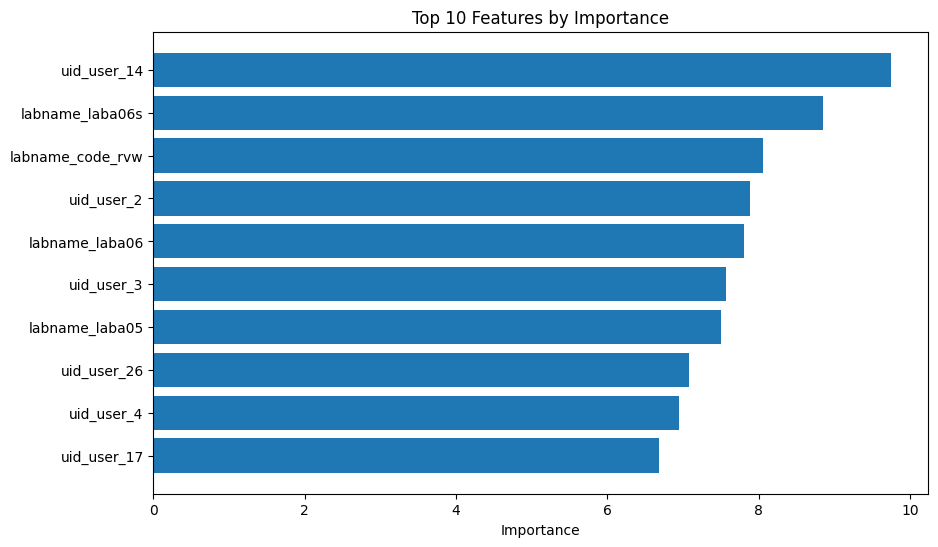

In [177]:
def plot_feature_importance(coef_, feature_names, top_n=10):
    importance = np.sum(np.abs(coef_), axis=0) # важность определяется абс.суммой коэффициентов
    top_n_idx = np.argsort(importance)[::-1][:top_n]
    # top_10 features и их важность
    top_n_features = np.array(feature_names)[top_n_idx]
    top_n_importance = importance[top_n_idx]
    
    plt.figure(figsize=(10, 6))
    plt.barh(top_n_features, top_n_importance)
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Features by Importance')
    plt.gca().invert_yaxis() 
    plt.show()

plot_feature_importance(logreg.coef_, X.columns, top_n=10)

### SVC

In [178]:
clf = SVC(probability=True, random_state=21)
clf.fit(X,y)
clf_pred = clf.predict(X)
metrics.accuracy_score(y, clf_pred)

0.8558718861209964

#### Different kernels

In [179]:
svc_linear = SVC(kernel='linear', probability=True,random_state=21)
svc_linear.fit(X,y)
svc_linear_pred = svc_linear.predict(X)
metrics.accuracy_score(y, svc_linear_pred)

0.702846975088968

In [180]:
svc_rbf = SVC(kernel='rbf', probability=True,random_state=21)
svc_rbf.fit(X,y)
svc_rbf_pred = svc_rbf.predict(X)
metrics.accuracy_score(y, svc_rbf_pred)

0.8558718861209964

In [181]:
svc_poly = SVC(kernel='poly', probability=True,random_state=21)
svc_poly.fit(X,y)
svc_poly_pred = svc_poly.predict(X)
metrics.accuracy_score(y, svc_poly_pred)

0.8594306049822064

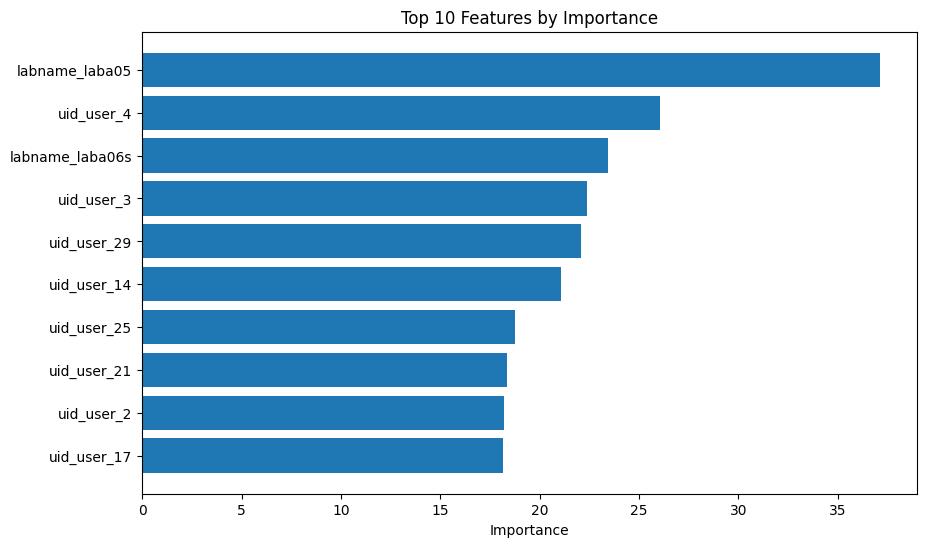

In [182]:
plot_feature_importance(svc_linear.coef_, X.columns, top_n=10)

### decision tree

In [183]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 42)
tree.fit(X,y)
tree_pred = tree.predict(X)
metrics.accuracy_score(y, tree_pred)

0.5516014234875445

In [184]:
tree_5 = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree_5.fit(X,y)
tree_5_pred = tree_5.predict(X)
metrics.accuracy_score(y, tree_5_pred)

0.6109134045077106

In [185]:
tree.feature_importances_

array([0.14931603, 0.06154574, 0.        , 0.        , 0.        ,
       0.        , 0.09837711, 0.        , 0.06455791, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.07642063,
       0.        , 0.        , 0.        , 0.        , 0.01610628,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06154768, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05479407, 0.        , 0.08646791,
       0.        , 0.05629871, 0.27456793])

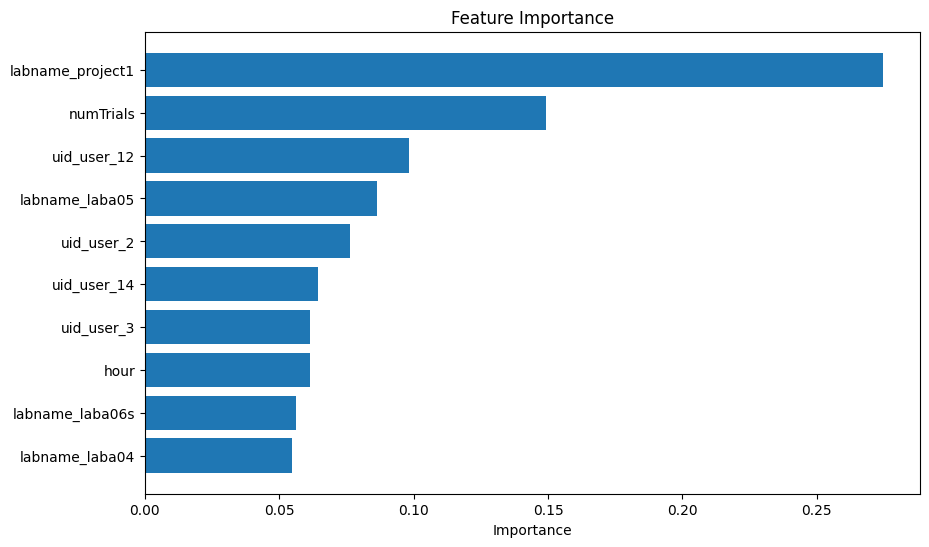

In [186]:
def plot_tree_importance(importances, feature_names, top_n=10):
    indices = np.argsort(importances)[::-1][:top_n]
    plt.figure(figsize=(10, 6))
    plt.barh(range(top_n), importances[indices], align="center")
    plt.yticks(range(top_n), np.array(feature_names)[indices])
    plt.xlabel('Importance')
    plt.gca().invert_yaxis()
    plt.title('Feature Importance')
    plt.show()
plot_tree_importance(tree.feature_importances_, X.columns)

### random forest

In [187]:
forest = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
forest.fit(X,y)
forest_pred = forest.predict(X)
metrics.accuracy_score(y, forest_pred)

1.0

In [188]:
# less n_estimators => less accuracy
forest_20 = RandomForestClassifier(n_estimators=20, max_depth=25, random_state=21)
forest_20.fit(X,y)
forest_20_pred = forest_20.predict(X)
metrics.accuracy_score(y, forest_20_pred)

0.998220640569395

In [189]:
# less max_depth => less accuracy
forest_10 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=21)
forest_10.fit(X,y)
forest_10_pred = forest_10.predict(X)
metrics.accuracy_score(y, forest_10_pred)

0.8855278766310795

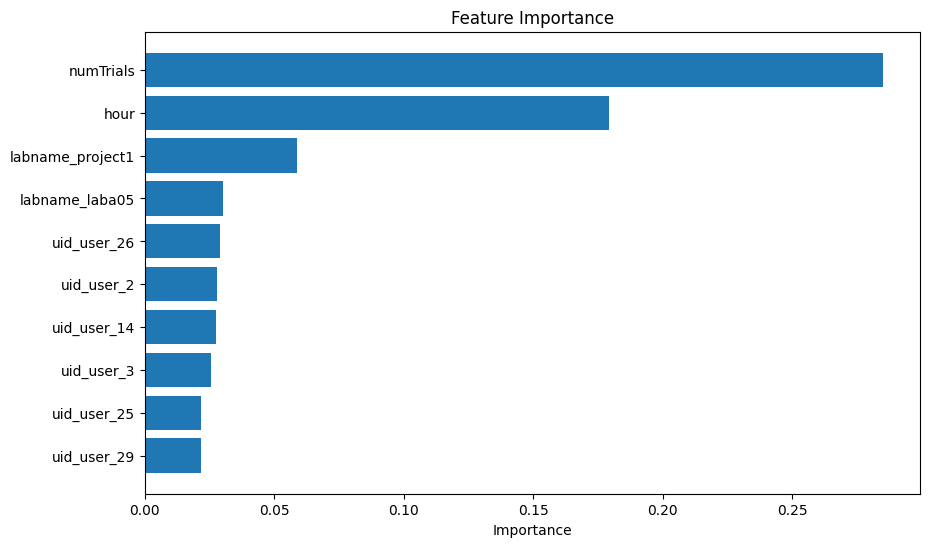

In [190]:
plot_tree_importance(forest.feature_importances_, X.columns)